In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("/Users/daichisato/Downloads/node_new.csv")
df=df.fillna(0)

In [3]:
df.columns

Index(['objectid', 'signal_f', 'name_kanji', 'name_yomi', 'density_5000m',
       'density_500m', 'xing_count', 'len1', 'len2', 'len3', 'len4', 'len5',
       'len6', 'len7', 'len8', 'linecnt1', 'linecnt2', 'linecnt3', 'linecnt4',
       'linecnt5', 'linecnt6', 'linecnt7', 'linecnt8', 'angle1', 'angle2',
       'angle3', 'angle4', 'angle5', 'angle6', 'angle7', 'angle8',
       'roadwidth1', 'roadwidth2', 'roadwidth3', 'roadwidth4', 'roadwidth5',
       'roadwidth6', 'roadwidth7', 'roadwidth8', 'lane_count1', 'lane_count2',
       'lane_count3', 'lane_count4', 'lane_count5', 'lane_count6',
       'lane_count7', 'lane_count8', 'roadclass1', 'roadclass2', 'roadclass3',
       'roadclass4', 'roadclass5', 'roadclass6', 'roadclass7', 'roadclass8',
       'double_line_4way', 'length_station', 'acc_angle_station',
       'angle_per_length_station', 'length_school', 'acc_angle_school',
       'angle_per_length_school', 'closeness_5000', 'closeness_500',
       'betweenness_5000', 'betweenness_5

### 車線数の最大値と最小値の差、幅の和、角度の最小値

事故件数


In [4]:
df["車両相互フラグ"]=df.車両相互.map(lambda x: 0 if x==0 else 1 if  x<=4 else 2)

In [5]:
df["車両相互フラグ"].value_counts()

1    2604
0    1224
2     652
Name: 車両相互フラグ, dtype: int64

In [6]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "traffic_volume_24h"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [8]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.88163265306122451

0.81327800829875518

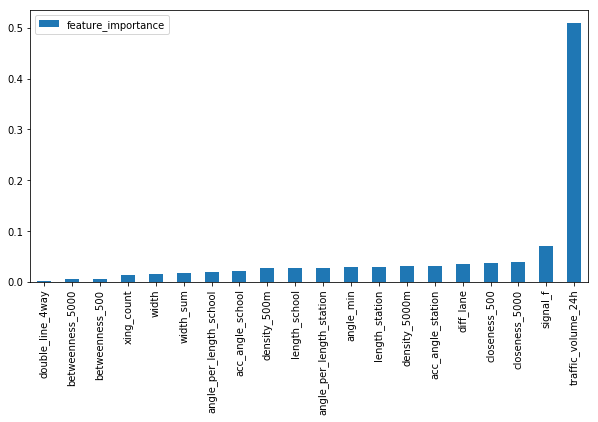

In [9]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "traffic_volume_24h"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




### 車線数の最大値と最小値の差、幅の和、角度の最小値

事故件数÷交通量

In [12]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00017 else 2)

In [13]:
df["車両相互フラグ"].value_counts()

1    2547
0    1319
2     614
Name: 車両相互フラグ, dtype: int64

In [ ]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width", "width_sum", "angle_min", "traffic_volume_24h"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [15]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [16]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.7367424242424242

0.5977011494252874

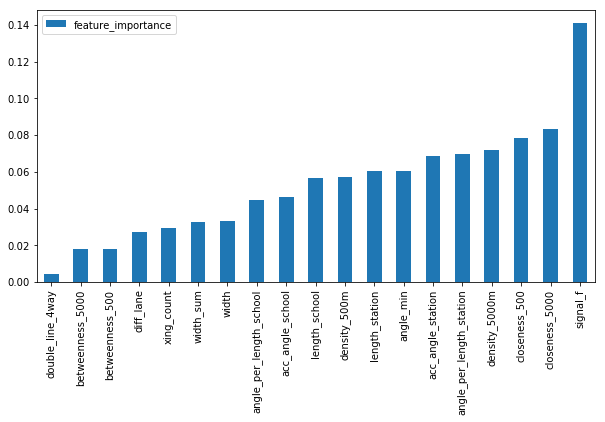

In [17]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()





### ロードクラスの最小

In [21]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00017 else 2)

In [22]:
df["車両相互フラグ"].value_counts()

1    2931
0    1351
2     678
Name: 車両相互フラグ, dtype: int64

In [23]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1351)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1351)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [25]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.78003696857670979

0.67025089605734767

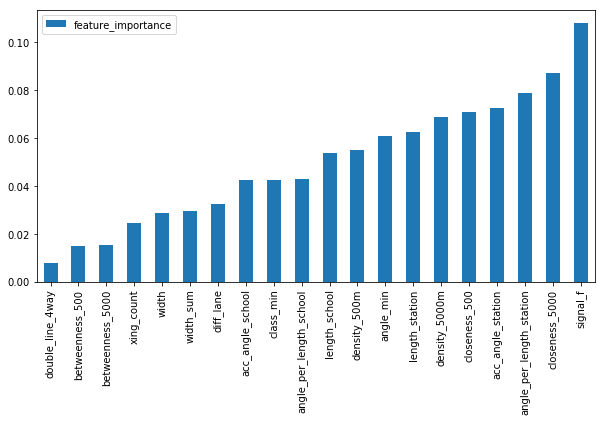

In [26]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width", "width_sum", "angle_min", "class_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()






In [30]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00017 else 2)

In [31]:
df["車両相互フラグ"].value_counts()

1    2931
0    1351
2     678
Name: 車両相互フラグ, dtype: int64

In [34]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1351)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1351)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [35]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [36]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.78188539741219965

0.66420664206642066

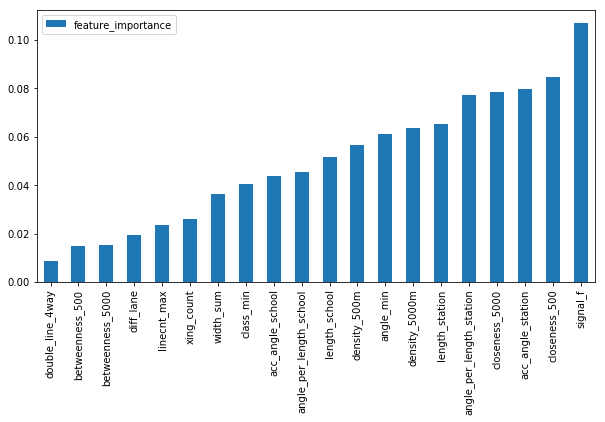

In [39]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()







In [48]:
df["人対車両フラグ"]=df.人対車両率.map(lambda x: 0 if x==0 else 1 if  x<0.000065 else 2)

In [49]:
df["人対車両フラグ"].value_counts()

0    4471
1     388
2     101
Name: 人対車両フラグ, dtype: int64

In [56]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["人対車両フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=489)

make_no_accidents=df[df["人対車両フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=489)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["人対車両フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [57]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [58]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.68367346938775508

0.67045454545454541

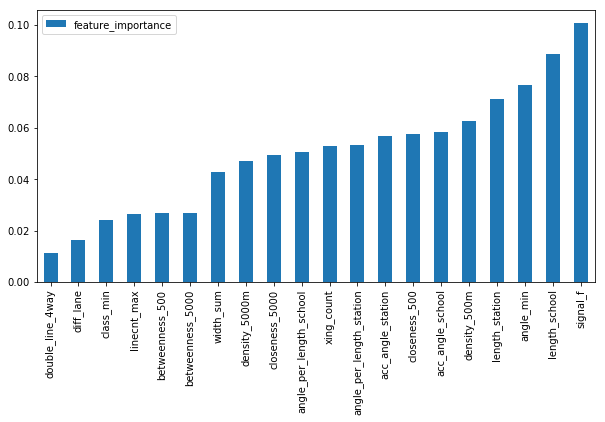

In [59]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()


In [104]:
df["車両単独フラグ"]=df.人対車両率.map(lambda x: 0 if x==0 else 1 if  x<0.0000220 else 2)

In [105]:
df["車両単独フラグ"].value_counts()

0    4471
2     381
1     108
Name: 車両単独フラグ, dtype: int64

In [110]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両単独フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=489)

make_no_accidents=df[df["車両単独フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=489)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両単独フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [111]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [112]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.64795918367346939

0.65979381443298968

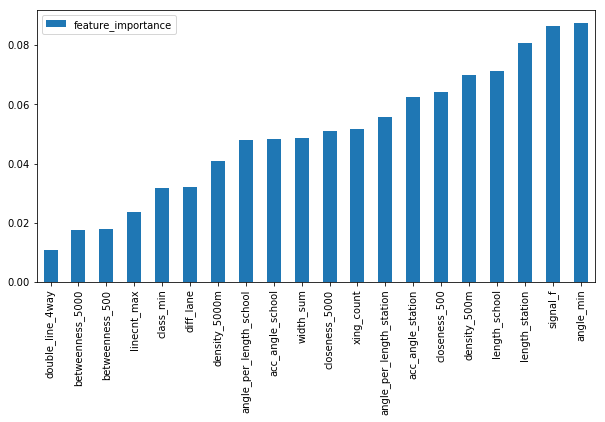

In [113]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width_sum", "angle_min", "class_min", "linecnt_max"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

